<a href="https://colab.research.google.com/github/Tyso/Innovize/blob/main/No_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving innovize_final_ml.csv to innovize_final_ml.csv


In [2]:
import pandas as pd
df = pd.read_csv('innovize_final_ml.csv')
print(df.head())


   phy_fitness    diet_pref       act_level  sleep_hrs  mindfulness  \
0          3.0        Vegan       Sedentary          7           10   
1          4.0        Vegan  Lightly Active          7            1   
2          8.0   Vegetarian          Active          8           10   
3          2.0  Pescatarian       Sedentary          8            7   
4          9.0  Pescatarian   Highly Active          5            7   

       career  gender  daily_avg_steps  daily_avg_calories  is_healthy  
0      Artist     1.0           2020.0              1831.0           0  
1     Teacher     0.0           5154.0              2190.0           0  
2  Freelancer     1.0          12363.0              2297.0           1  
3      Doctor     0.0           1664.0              1943.0           0  
4    Business     0.0          17680.0              3527.0           1  


In [3]:
print(df.head())

   phy_fitness    diet_pref       act_level  sleep_hrs  mindfulness  \
0          3.0        Vegan       Sedentary          7           10   
1          4.0        Vegan  Lightly Active          7            1   
2          8.0   Vegetarian          Active          8           10   
3          2.0  Pescatarian       Sedentary          8            7   
4          9.0  Pescatarian   Highly Active          5            7   

       career  gender  daily_avg_steps  daily_avg_calories  is_healthy  
0      Artist     1.0           2020.0              1831.0           0  
1     Teacher     0.0           5154.0              2190.0           0  
2  Freelancer     1.0          12363.0              2297.0           1  
3      Doctor     0.0           1664.0              1943.0           0  
4    Business     0.0          17680.0              3527.0           1  


In [4]:
print("Number of row and column of the dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Number of row and column of the dataset:
Rows: 6000, Columns: 10


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:

X = df[['phy_fitness', 'mindfulness']]
y = df['is_healthy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9217


In [15]:

x_min, x_max = X['phy_fitness'].min() - 1, X['phy_fitness'].max() + 1
y_min, y_max = X['mindfulness'].min() - 1, X['mindfulness'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


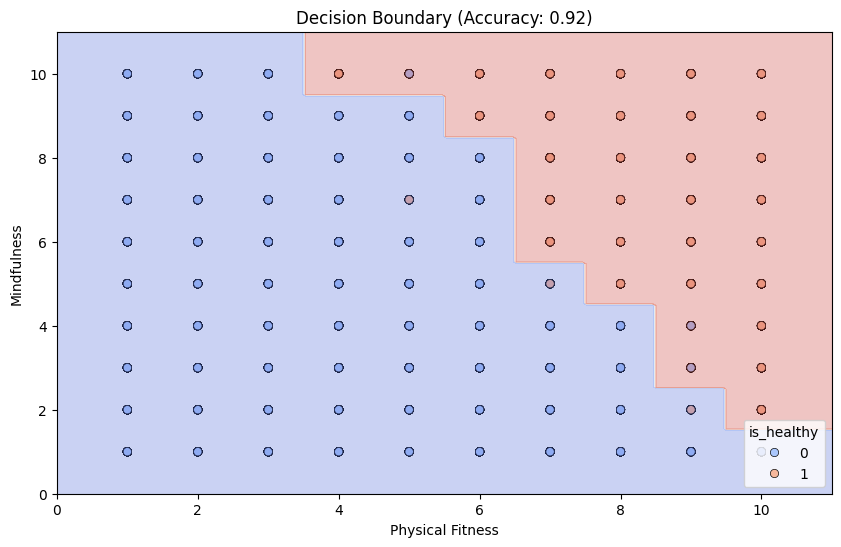

In [16]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['phy_fitness'], y=X_train['mindfulness'], hue=y_train, palette='coolwarm', edgecolor='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel("Physical Fitness")
plt.ylabel("Mindfulness")
plt.title(f"Decision Boundary (Accuracy: {accuracy:.2f})")
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [ ]:

file_path = "innovize_final_ml.csv"
df = pd.read_csv(file_path)
df = df.dropna(subset=["is_healthy"])
num_cols = ["phy_fitness", "daily_avg_steps", "daily_avg_calories", "gender"]
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])
cat_cols = ["diet_pref", "act_level", "career"]
imputer_cat = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])



In [18]:

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["is_healthy"])
y = df["is_healthy"]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:

def predict_health():
    print("Enter the following details:")
    phy_fitness = float(input("Physical Fitness Score (1-10): "))
    mindfulness = int(input("Mindfulness Score (1-10): "))
    sleep_hrs = int(input("Sleep Hours Per Day: "))
    daily_avg_steps = float(input("Average Steps Per Day: "))
    daily_avg_calories = float(input("Average Calories Per Day: "))
    gender = float(input("Gender (0 for Female, 1 for Male): "))
    diet_pref = input("Diet Preference (Vegan, Vegetarian, Non-Vegetarian, etc.): ")
    act_level = input("Activity Level (Sedentary, Lightly Active, Active, Very Active): ")
    career = input("Career Type: ")

    diet_pref_enc = label_encoders["diet_pref"].transform([diet_pref])[0] if diet_pref in label_encoders["diet_pref"].classes_ else 0
    act_level_enc = label_encoders["act_level"].transform([act_level])[0] if act_level in label_encoders["act_level"].classes_ else 0
    career_enc = label_encoders["career"].transform([career])[0] if career in label_encoders["career"].classes_ else 0
    user_df = pd.DataFrame([[phy_fitness, diet_pref_enc, act_level_enc, sleep_hrs, mindfulness, career_enc, gender, daily_avg_steps, daily_avg_calories]], columns=X.columns)
    user_df[num_cols] = scaler.transform(user_df[num_cols])
    user_input_scaled = user_df.values
    prediction = model.predict(user_input_scaled)
    print("\nPrediction: The person is", "HEALTHY" if prediction[0] == 1 else "UNHEALTHY")

predict_health()

Enter the following details:
Physical Fitness Score (1-10): 1
Mindfulness Score (1-10): 2
Sleep Hours Per Day: 7
Average Steps Per Day: 50000
Average Calories Per Day: 4546
Gender (0 for Female, 1 for Male): 1
Diet Preference (Vegan, Vegetarian, Non-Vegetarian, etc.): Non-Vegetarian
Activity Level (Sedentary, Lightly Active, Active, Very Active): Active
Career Type: Teacher

Prediction: The person is UNHEALTHY


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
